In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# In order to see matplotlib plots in a Jupyter Notebook we need to use the following:
%matplotlib inline

In [3]:
N = 4
M = 946

In [4]:
noise = np.random.randn(M * 2, 2)
noise.shape

(1892, 2)

In [5]:
#Не изменится от кол-ва облаков :(
sh = 0.38;
#sh = 0
mn = 1;
cloud0 = mn * (noise + np.array([-sh, sh]))
cloud1 = mn * (noise + np.array([sh, sh]))
cloud2 = mn * (noise + np.array([-sh, -sh]))
cloud3 = mn * (noise + np.array([sh, -sh]))

In [6]:
XY = np.vstack([cloud0, cloud1, cloud2, cloud3])
annotations = np.zeros(M * 2 * N, dtype = int)
for i in range(1, N):
    curr = i * M * 2
    annotations[curr : curr + M * 2] = annotations[curr : curr + M * 2] + [i] * M * 2

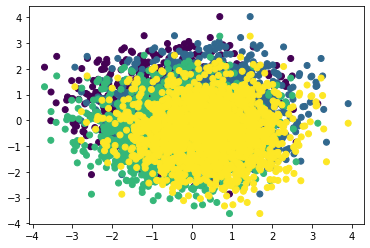

In [7]:
plt.scatter(XY[:,0], XY[:,1], c=annotations)

In [8]:
print('Cloud 0 mean, std, center:')
print(cloud0.mean())
print(cloud0.std())
print(cloud0.mean(axis=0))
print('Cloud 1 mean, std, center:')
print(cloud1.mean())
print(cloud1.std())
print(cloud1.mean(axis=0))
print('Cloud 2 mean, std, center:')
print(cloud2.mean())
print(cloud2.std())
print(cloud2.mean(axis=0))
print('Cloud 3 mean, std, center:')
print(cloud3.mean())
print(cloud3.std())
print(cloud3.mean(axis=0))

Cloud 0 mean, std, center:
-0.0029489947258738423
1.0557077953858567
[-0.36147923  0.35558124]
Cloud 1 mean, std, center:
0.3770510052741261
0.9931948287159292
[0.39852077 0.35558124]
Cloud 2 mean, std, center:
-0.38294899472587385
0.9931948287159292
[-0.36147923 -0.40441876]
Cloud 3 mean, std, center:
-0.0029489947258738414
1.071052279927391
[ 0.39852077 -0.40441876]


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [10]:
print(XY.shape)
print(annotations.shape)
data, labels = shuffle(XY, annotations)
print(data)
print(labels)

(7568, 2)
(7568,)
[[-0.11218445 -0.63073303]
 [ 0.8214511  -0.79510919]
 [-0.59799703  0.25620338]
 ...
 [-0.45445382 -1.89748225]
 [-0.12074205  0.95401742]
 [-1.75089587  0.93310596]]
[0 1 0 ... 3 3 1]


In [11]:
A = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
ann = np.array([0, 0, 1, 1])
print(A.shape)
print(ann.shape)
data1, labels1 = shuffle(A, ann)
print(data1)

(4, 2)
(4,)
[[1 2]
 [5 6]
 [7 8]
 [3 4]]


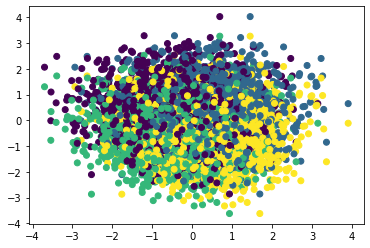

In [12]:
plt.scatter(data[:,0], data[:,1], c=labels)

In [13]:
test_size = int(len(data) * 0.5)
Xtrain = data[:test_size]
Ytrain = labels[:test_size]
Xtest = data[test_size:]
Ytest = labels[test_size:]

In [14]:
clf = LogisticRegression()
clf.fit(Xtrain, Ytrain);

/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/jupyter_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
predictions = clf.predict(Xtest)

In [16]:
print(confusion_matrix(Ytest, predictions))
print(accuracy_score(Ytest, predictions))

[[390 211 228 138]
 [201 399 118 223]
 [206 110 384 239]
 [105 216 209 407]]
0.4175475687103594


In [17]:
wr = predictions - Ytest
wr_count = 0
for i in range(test_size):
    if (wr[i] != 0):
        wr_count += 1

right = test_size - wr_count
print(right)
print(test_size)
print(right / test_size)

1580
3784
0.4175475687103594
